# Plotting Notebook 

In [1]:
import evaluation_metrics as em
import numpy as np
%matplotlib inline

# Load predictions and arrays 

In [2]:
predictions20 = np.load('./SampleOutput/FastText_Emb20.npy')
predictions30 = np.load('./SampleOutput/FastText_Emb30.npy')
actual = np.load('./SampleOutput/actual.npy')

# Five types of plots 

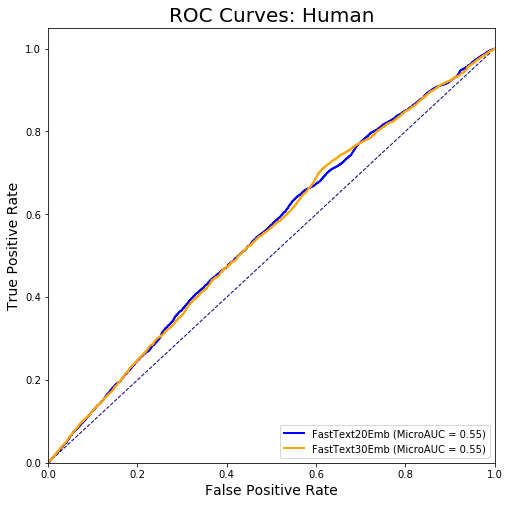

In [6]:
em.plot_multiple_AUC_curves([predictions20, predictions30], actual, ['FastText20Emb', 'FastText30Emb'],
                            'Human')

/Users/Brenton/Documents/Capstone/Beyond-Google/evaluation_metrics.py:153: RuntimeWarning: invalid value encountered in true_divide
  FScores = 2*precision*recall/(precision+recall)


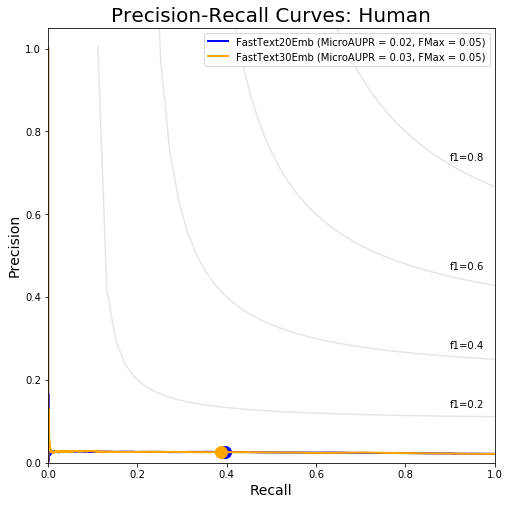

In [7]:
em.plot_multiple_AUPR_curves([predictions20, predictions30], actual, ['FastText20Emb', 'FastText30Emb'],
                            'Human')



In [11]:
#Pick one version for bar charts - predictions20.
#Generally, we should pick the best model. 
AUCs20 = em.find_GoTerm_aucs(predictions20, actual)
AUPRs20 = em.find_GoTerm_auprs(predictions20, actual)
FScores20 = em.find_GoTerm_FScores(predictions20, actual)

/Users/Brenton/Documents/Capstone/Beyond-Google/evaluation_metrics.py:74: RuntimeWarning: invalid value encountered in true_divide
  FScores = 2*precision*recall/(precision+recall)


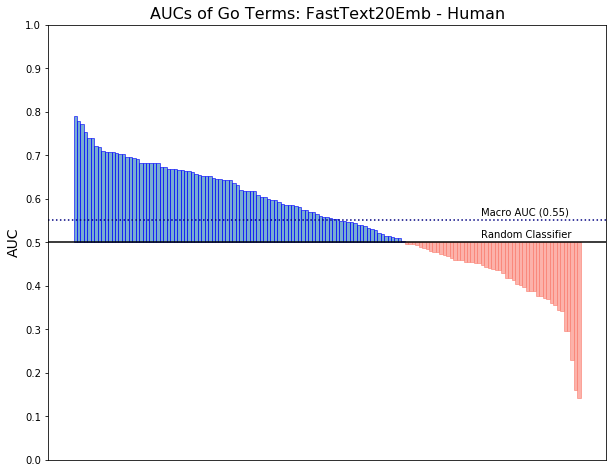

In [9]:
em.plot_GoTerm_Bars(AUCs20, 'FastText20Emb', 'Human')

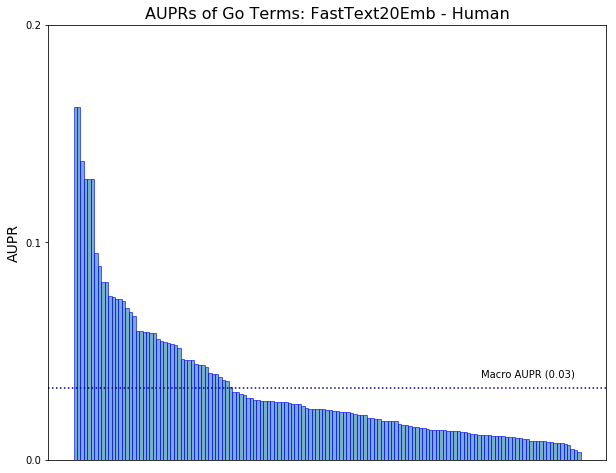

In [10]:
em.plot_GoTerm_Bars_AUPR(AUPRs20, 'FastText20Emb', 'Human')

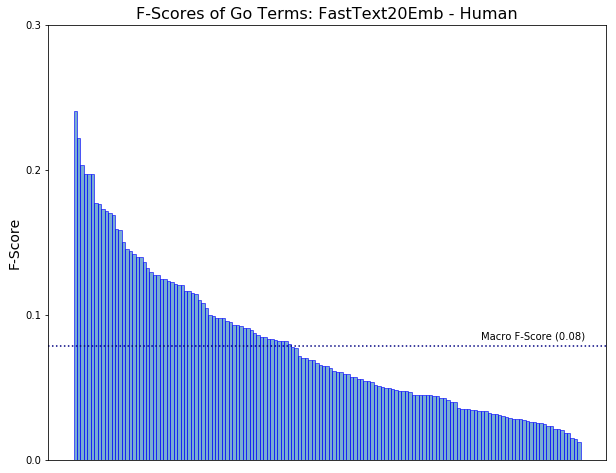

In [12]:
em.plot_GoTerm_Bars_Fscore(FScores20, 'FastText20Emb', 'Human')